<a href="https://colab.research.google.com/github/aneeshcheriank/approaching-any-machine-learning-problem/blob/main/Feature_engineering_ipny.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Feature Engineering
- better features -> better model
- domain knowledge -> better features
- feature engineering
    - creating features
    - normalzations
    - trasformations

## In this chapter
- combine categorical variables
### convert categorical variables
- count
- target encoding
- embeddings


## Date field
- Year
- Week of year
- Month
- Day of week
- Weekend
- Hour
- Many more

- code <br>
`
df['year'] = df['datetime_column'].dt.year`

`f['datetime_column'].dt.weekofyear`

`df['datetime_column'].dt.moth`

`df['datetime_column'].dt.dayofweek`

`(df['datetime_column'].dt.weekday > 5).astype(int)`

`df['datetime_column'].dt.hour
`

In [ ]:
import pandas as pd

# create a seres of datetime with a frequency of 10 hours
s = pd.date_range('2020-01-06', '2020-01-10', freq='10H').to_series()

# create some features based on datetime
features = {
    'dayofweek': s.dt.dayofweek.values,
    'dayofyear':s.dt.dayofyear.values,
    'hour':s.dt.hour.values, 
    'is_leap_year':s.dt.is_leap_year.values,
    'quarter': s.dt.quarter.values,
    'weekofyear':s.dt.weekofyear.values
}

features

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  del sys.path[0]


{'dayofweek': array([0, 0, 0, 1, 1, 2, 2, 2, 3, 3]),
 'dayofyear': array([6, 6, 6, 7, 7, 8, 8, 8, 9, 9]),
 'hour': array([ 0, 10, 20,  6, 16,  2, 12, 22,  8, 18]),
 'is_leap_year': array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True]),
 'quarter': array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1]),
 'weekofyear': array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2])}

## Data frame with following details

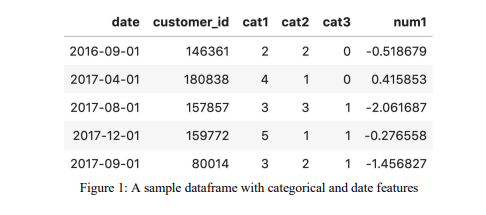

- one date column
  - features like
    - year, month, quarter, etc
- customer id column
  - what month customer is more active
  - count of cat1, cat2, cat3 for a customer
  - count for cat1, cat2, cat3 for a given week of the yeaer
  - what is the mean of num1 for a given customer
  - so on

  - using the aggregate function of pandas we can create such features

In [ ]:
def generate_features(df):
    # create a bunch of features using the date column
    df.loc[:, 'year'] = df['date'].dt.year
    df.loc[:, 'weekofyear'] = df['date'].dt.weekofyear
    df.loc[:, 'month'] = df['date'].dt.month
    df.loc[:, 'dayofweek'] = df['date'].dt.dayofweek
    df.loc[:, 'weekend'] = (df['date'].dt.weekday >=5).astype(int)

    # create an aggregate dictionary
    aggs = {}
    # for aggregation by month, we calculate the
    # number of unique month values and also the mean
    aggs['month'] = ['nunique', 'mean']
    aggs['weekofyear'] = ['nunique', 'mean']
    # we aggregate by num1 and calculate sum, max, min
    # and mean values of this column
    aggs['num1'] = ['sum','max','min','mean']
    # for customer_id, we calculate the total count
    aggs['customer_id'] = ['size']
    # again for customer_id, we calculate the total unique
    aggs['customer_id'] = ['nunique']

    # we group by customer_id and calculate the aggregates
    agg_df = df.groupby('customer_id').agg(aggs)
    agg_df = agg_df.reset_index()
    return agg_df

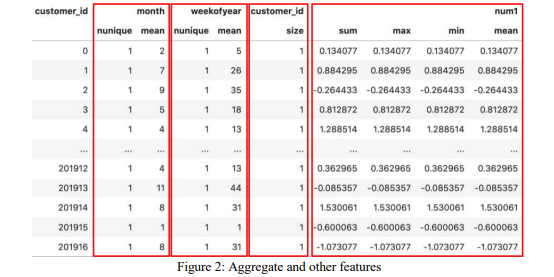

## Time series data
- trasaction by constomer over a period of time
- features may be
  - mean
  - max
  - min
  - unique
  - skew
  - kurtosis
  - kstat
  - percentile
  - quantile
  - peak to peak
  - many more

In [ ]:
import numpy as np

feature_dict = {}

# calculate mean
feature_dict['mean'] = np.mean(x)

# calculate max
feature_dict['max'] = np.max(x)

# calculate min
feature_dict['min'] = np.min(x)

# calculate standard deviation
feature_dict['std'] = np.std(x)

# calculate variance
feature_dict['var'] = np.var(x)

# peak-to-peak
feature_dict['ptp'] = np.ptp(x)

# percentile features
feature_dict['percentile_10'] = np.percentile(x, 10)
feature_dict['percentile_60'] = np.percentile(x, 60)
feature_dict['percentile_90'] = np.percentile(x, 90)

# quantile features
feature_dict['quantile_5'] = np.percentile(x, 5)
feature_dict['quantile_95'] = np.percentile(x, 95)
feature_dict['quantile_99'] = np.percentile(x, 99)

- tsfresh library for times series features



In [ ]:
from tsfresh.feature_extraction import feature_calculators as fc

# tsfresh based features
feature_dict['abs_energy'] = fc.abs_energy(x)
feature_dict['count_above_mean'] = fc.count_above_mean(x)
feature_dict['count_below_mean'] = fc.count_below_mean(x)
feature_dict['mean_abs_change'] = fc.mean_abs_change(x)
feature_dict['mean_change'] = fc.mean_change(x)

- simple way to generate many features is just to create a bunch of <b>polynomial features</b>
- a second degree polynomial features from two features 'a' and 'b' will produce
- a, b, ab, a<sup>2</sup>, b<sup>2</sup>

In [2]:
import numpy as np
import pandas as pd

# generate a random dataframe with 2 columns and 100 rows
df = pd.DataFrame(
    np.random.rand(100, 2),
    columns=[f'f_{i}' for i in range(1, 3)]
)

df.head()

,f_1,f_2
0,0.330470,0.891961
1,0.972454,0.976299
2,0.298695,0.146702
3,0.376106,0.444427
4,0.257275,0.145562


- can create ploynomial features using PolynomialFeatures from scikit-learn

In [7]:
from sklearn import preprocessing

# initialize polynomial features class object
# for two-degree polynomial features
pf = preprocessing.PolynomialFeatures(
    degree=2,
    interaction_only=False,
    include_bias=False
)

# fit to the features
pf.fit(df)

# create polynomial features
poly_feats = pf.transform(df)

# create a dataframe with all the features
num_feats = poly_feats.shape[1]
df_trasformed = pd.DataFrame(
    poly_feats,
    columns=[f'f_{i}' for i in range(1, num_feats + 1)]
)

df_trasformed.head()

,f_1,f_2,f_3,f_4,f_5
0,0.330470,0.891961,0.109211,0.294767,0.795594
1,0.972454,0.976299,0.945667,0.949406,0.953161
2,0.298695,0.146702,0.089218,0.043819,0.021522
3,0.376106,0.444427,0.141456,0.167152,0.197515
4,0.257275,0.145562,0.066190,0.037449,0.021188


In [11]:
# to get the attributes of a class
pf.__dict__

{'_max_degree': 2,
 '_min_degree': 0,
 '_n_out_full': 5,
 'degree': 2,
 'feature_names_in_': array(['f_1', 'f_2'], dtype=object),
 'include_bias': False,
 'interaction_only': False,
 'n_features_in_': 2,
 'n_output_features_': 5,
 'order': 'C'}

## binning of numerical features
- convert to categorical


In [15]:
# 10 bins
df['f_bin_10'] = pd.cut(df['f_1'], bins=10, labels=False)
# 100 bins
df['f_bin_100'] = pd.cut(df['f_1'], bins=100, labels=False)

df.head()

,f_1,f_2,f_bin_10,f_bin_100
0,0.330470,0.891961,3,32
1,0.972454,0.976299,9,97
2,0.298695,0.146702,2,29
3,0.376106,0.444427,3,37
4,0.257275,0.145562,2,25


- can use the binned features with the categorical features
- another feature engineering is log trasformation
  - particulary useful for high varience features

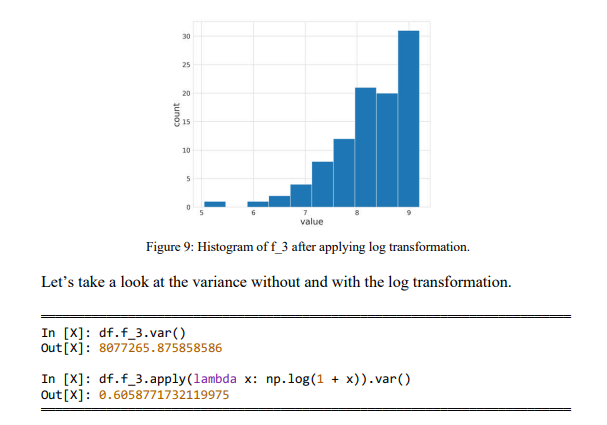


- sometime you can use exp insted of log 
- when use log-based evaluation metrics
  - train on log trasformed targets
  - convert target back to original using exponential on the prediction
  - this will help optimize the model for the metrics

- Feature creation
  - on intution, no rules
  - industry specific (domain knowledge)

## Missing values
- categorical / Neumerical
- handling the missing values also comes under feature engineering
- missing values for categorical, treat it as a new category
- missing values for numerical variables
  - add a value that doesn't appear in that list
  - replace with mean/median

  - K-nearest neighbours to fill the missing values

In [6]:
import numpy as np
from sklearn import impute

# create a random numpy array with 10 samples
# and 6 features and values are ranging from 1 tp 15
X = np.random.randint(1, 15, (10, 6))

print('x')
print(X)

# convert the array to float
X = X.astype(float)

# randomly assign 10 elements to NAN (missing)
X.ravel()[np.random.choice(X.size, 10, replace=False)] = np.nan

print('imputed values')
# use 3 nearest neighbours to fill the na values
knn_imputer = impute.KNNImputer(n_neighbors=2)
knn_imputer.fit_transform(X)


x
[[13  5 14 13  2  1]
 [ 6  9  1 14 11 10]
 [ 7  5  5  8 11  3]
 [10 10 10 14  2  4]
 [12  7  1  7  9  5]
 [ 4 13 14  8 10  8]
 [ 4  9 12  2  6 11]
 [ 5 12  7  5 12  6]
 [ 4  8 13  6  3  9]
 [14 13 13 10  9  4]]
imputed values


array([[13. ,  5. , 14. , 13. ,  2. ,  4. ],
       [ 6. ,  9. ,  1. , 14. , 11. ,  4. ],
       [ 7. ,  9.5,  5. ,  8. , 10.5,  3. ],
       [10. , 10. ,  9.5, 14. ,  2. ,  4. ],
       [12. ,  7. ,  1. , 11. ,  9. ,  5. ],
       [ 4. , 13. , 14. ,  8. , 10. ,  8. ],
       [ 4. ,  9. , 12. ,  2. ,  6. , 11. ],
       [ 5.5, 12. ,  7. ,  5. , 12. ,  6. ],
       [ 4. ,  8. , 13. ,  6. ,  8. ,  9.5],
       [14. , 13. , 13. , 10. ,  9. ,  4. ]])

- another way to impute missing values
  - train a regression model for the missing columns
- Note: Imputing missing values for tree based models are unnecessary, as they can handle it

# Feature selection
- too many fetature is a problem
- curse of dimentionalaity

- <b>remove features with very low variance</b>

- code

In [ ]:
from sklearn.feature_selection import VarainceThreshold

data = ...
var_thresh = VarainceThreshold(threshold=0.1)
trasfromed_data = var_thresh.fit_transform(data)
# trasformed data will have all the columns with variance less than 0.1 removed

- we can remove columns with very high correlation

In [8]:
import pandas as pd
from sklearn.datasets import fetch_california_housing

# fetch a regression dataset
data = fetch_california_housing()
X = data['data']
col_names = data['feature_names']
y = data['target']

# convert to pandas dataframe
df = pd.DataFrame(X, columns=col_names)
# introduce highly correlated column
df['MedInc_Sqrt'] = df.MedInc.apply(np.sqrt)

df.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedInc_Sqrt
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.984329
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,-0.132797
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.326688
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.066910
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,0.018415
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,0.015266
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.084303
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.015569
MedInc_Sqrt,0.984329,-0.132797,0.326688,-0.066910,0.018415,0.015266,-0.084303,-0.015569,1.000000


## Univariate feature selection
- scoring each feature against a given target
- some methods
  - Mutal information
  - ANOVA F-test
  - chi<sup>2</sup> : data only for non-negative in nature
    - useful for natural language processing
    - bag of words of tf-idf based features
- Two ways we can use this in the scikit learn
  - SelectKBest: select the top K scoring features
  - SelectPercentile: It keeps the top features which are in a percentile specified by the user

In [17]:
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import SelectPercentile


class UnivariateFeatureSelection:
  def __init__(self, n_features, problem_type, scoring):
    '''
    Custom univariate feature slection wrappter on different univariate feature
    selection models from scikit-learn.
    :para n_features: SelectPercentile if float else SelectKBest
    :param problem_type: classification or regression
    :param scoring: scoring function, string
    '''
    # for a given problem type, there are onely a few valid scoring methods
    # you can extend this with your own custom methods if you wish
    if problem_type == 'classification':
      valid_scoring = {
          'f_classif': f_classif,
          'chi2': chi2,
          'mutal_info_classif': mutual_info_classif
      }
    else:
      valid_scoring = {
          'f_regression': f_regression,
          'mutal_info_regression': mutual_info_regression
      }

    # rise exception if we do not have a valid scoring method
    if scoring not in valid_scoring:
      raise Exception('Invalid Scoring Function')

    # if n_features is int, we use selectkbest
    # if n_features is float, we use selectpercentile
    # please note that it is int in both cases in sklearn
    if isinstance(n_features, int):
      self.selection = SelectKBest(
          valid_scoring[scoring],
          k=n_features
      )
    elif isinstance(n_features, float):
      self.selection = SelectPercentile(
          valid_scoring[scoring],
          percentile=int(n_features*100)
      )
    else:
      raise Exception('Invalid type of features')

  # same fit function
  def fit(self, X, y):
    return self.selection.fit(X, y)

  # same transform function
  def transform(self, X):
    return self.selection.transform(X)

  # same fit_transform function
  def fit_transform(self, X, y):
    return self.selection.fit_transform(X, y)

In [22]:
ufs = UnivariateFeatureSelection(
    n_features=5,
    problem_type='regression',
    scoring='f_regression'
)
ufs.fit(X, y)
X_transfromed = ufs.transform(X)

In [23]:
X_transfromed

array([[ 8.3252    , 41.        ,  6.98412698,  1.02380952, 37.88      ],
       [ 8.3014    , 21.        ,  6.23813708,  0.97188049, 37.86      ],
       [ 7.2574    , 52.        ,  8.28813559,  1.07344633, 37.85      ],
       ...,
       [ 1.7       , 17.        ,  5.20554273,  1.12009238, 39.43      ],
       [ 1.8672    , 18.        ,  5.32951289,  1.17191977, 39.43      ],
       [ 2.3886    , 16.        ,  5.25471698,  1.16226415, 39.37      ]])

- Univriate selction needs
- better to create less and important featues than 100's of features
- univariate selection may not always perform well
  - usually people prefer doing feature selection using a machine learning model

## Model to select features
- greedy feature selection
  - choose a model
  - choose a loss/scoring function
  - evaluate each feature
    - add to the featue list if it improves the loss/score
  ### note
  - computational cost with this is more


In [ ]:
# greedy.py

import pandas as pd

from sklearn import linear_model
from sklearn import metrics
from sklearn.datasets import make_classification

class GreedyFeatureSelection:
  '''
  A Simple and custom class for greedy feature selection.
  You will need to modify it quite a bit to make it suitable for you
  '''
  def evaluation_score(self, X, y):
    '''
    This function will evaluates model on data and returns Area Under ROC 
    Curve (AUC)
    Note: We fit the data and calculate AUC on same data.
    WE are overfitting here.
    But this is also a way to achieve greedy selection.
    k-fold will take k times longer.

    If you want to implement it in really correct way, calcuate OOF AUC
    and return mean AUC over K folds. This require only a few lines of change
    and has been shown a few times in this book.

    :param X: training data
    :param y: targets
    :return: overfitted area under the roc curve
    '''

    # fit the logistic regression model,
    # and calculate AUC on the same data
    # again: BEWARE
    # you  can choose any model that suits your data
    model = linear_model.LogisticRegression()
    model.fit(X, y)
    predictions = model.predict_proba(X)[:, 1]
    auc = metrics.roc_auc_score(y, predictions)
    return auc

  def _feature_selection(self, X, y):
    """
    This function does the actual greedy selection
    :param X: data, numpy array
    :param y: targets, numpy array
    :return: (best scores, best features)
    """

    # initialize good features list
    # and best scores to keep track of both
    good_features = []
    best_scores = []

    # calculate the number of features
    num_features = X.shape[1]

    # infinite loop
    while True:
      # initalize best feature and score of this loop
      this_feature = None
      best_score = 0

      # loop over all features
      for feature in range(num_features):
        # if feature is already in good features,
        # skip this for loop
        if feature in good_features:
          continue
        # selected features are all good features till now and current feature
        selected_features = good_features + [feature]
        # remove all the other features from data
        xtrain = X[:, selected_features]
        # calculate the score, in our case AUC
        score = self.evaluate_score(xtrain, y)